# Выбор локации для скважины

# Билблиотеки

In [138]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from tqdm.notebook import tqdm
from scipy import stats as st

## Загрузка и подготовка данных

*В Древнем Египте вращательное бурение (сверление) применялось при строительстве пирамид около 6000 лет назад.*

Выгрузим данные из файлов в соответствующие переменные

In [139]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Разведка региона 1

Посмотрим количество строк и столбцов

In [140]:
data_0.shape

(100000, 5)

Посмотрим названия столбцов и краткое содержание данных в них

In [141]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Проверим типы данных

In [142]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Посмотрим общие статистические данные по данным 🙃

In [143]:
data_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


Проверим гистограммы распределения частот в данных

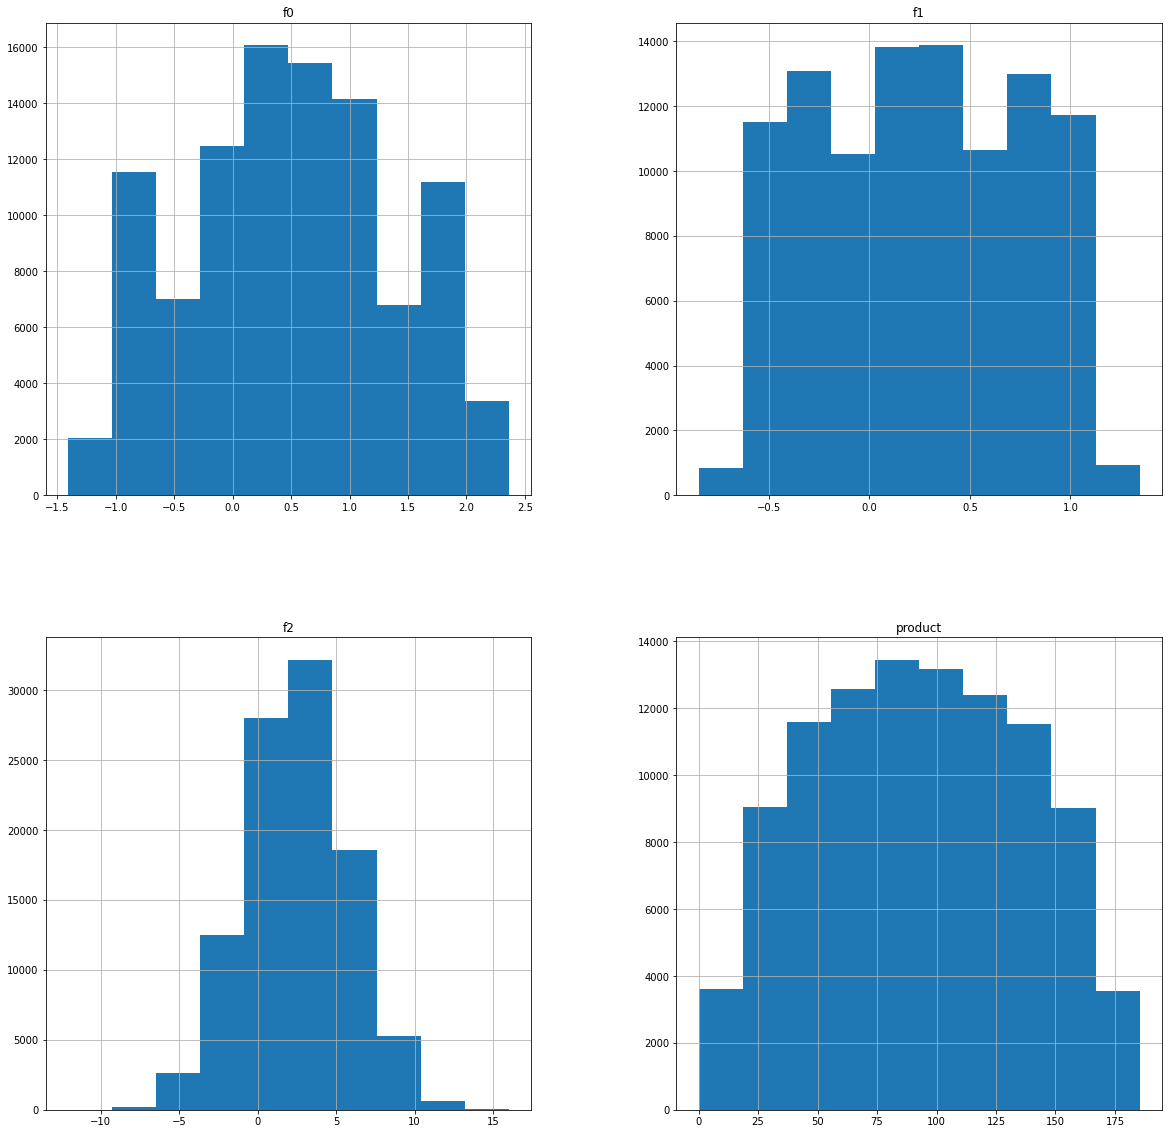

In [144]:
data_0.hist(figsize=(20,20))
plt.show()

Проверим корреляцию частот в данных

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


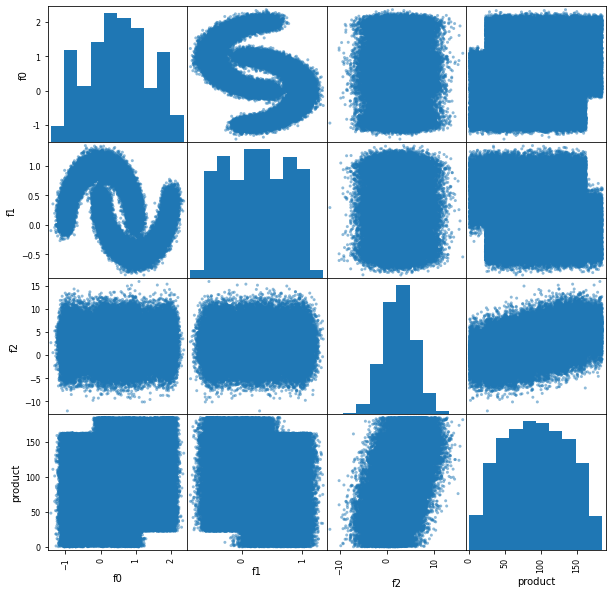

In [145]:
print(data_0.corr())
pd.plotting.scatter_matrix(data_0, figsize=(10, 10)) 
plt.show()

Проверим пропуски

In [146]:
data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Проверим дубликаты

In [147]:
data_0.duplicated().sum()

0

Вывод по 1 региону:
- Имеем 10000 срок и 4 столбца
- Типы данных float64
- Данные нормально распределены
- Нет пропусков и дубликатов
- Интерессная корреляция признаков f1 и f0

### Разведка региона 2

In [148]:
data_1.shape

(100000, 5)

In [149]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [150]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [151]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


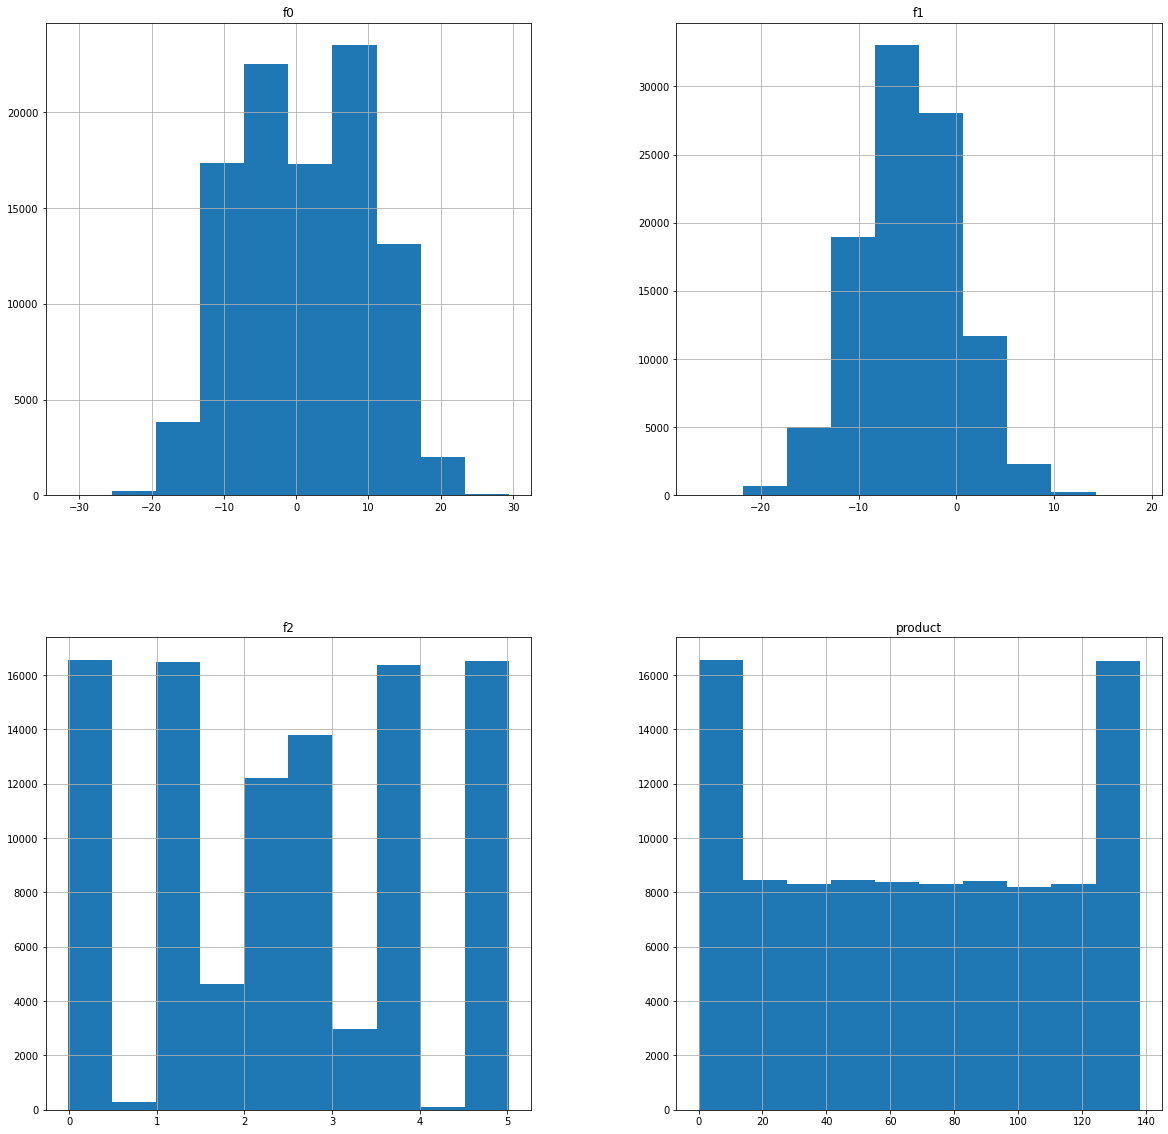

In [152]:
data_1.hist(figsize=(20,20))
plt.show()

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


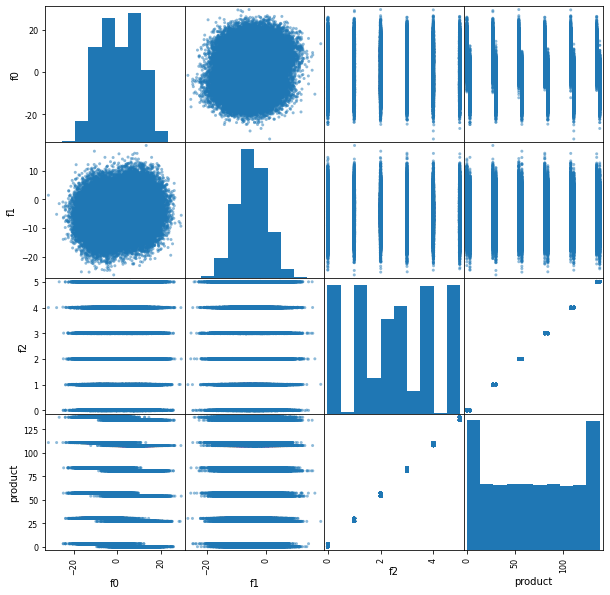

In [153]:
print(data_1.corr())
pd.plotting.scatter_matrix(data_1, figsize=(10, 10)) 
plt.show()

In [154]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [155]:
data_1.duplicated().sum()

0

Вывод по 2 региону:
- Имеем 10000 срок и 4 столбца
- Типы данных float64
- Данные нормально распределены
- Нет пропусков и дубликатов
- Интерессная корреляция признаков, особенно целевого признака, где явно видны 2 моды в минимальных и максимальных значения

### Разведка региона 3

In [156]:
data_2.shape

(100000, 5)

In [157]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [158]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [159]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


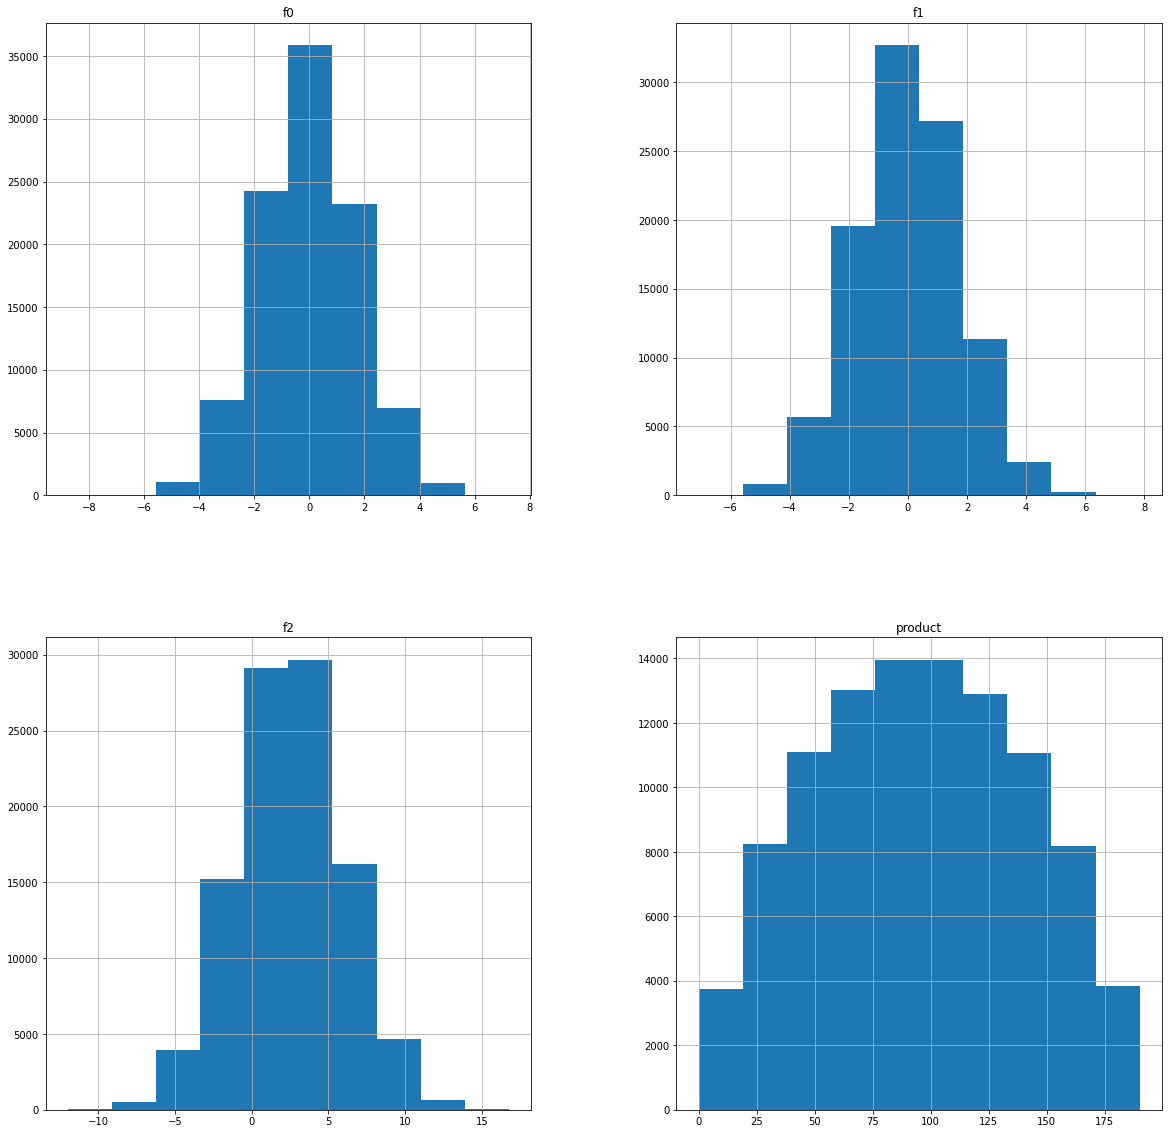

In [160]:
data_2.hist(figsize=(20,20))
plt.show()

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


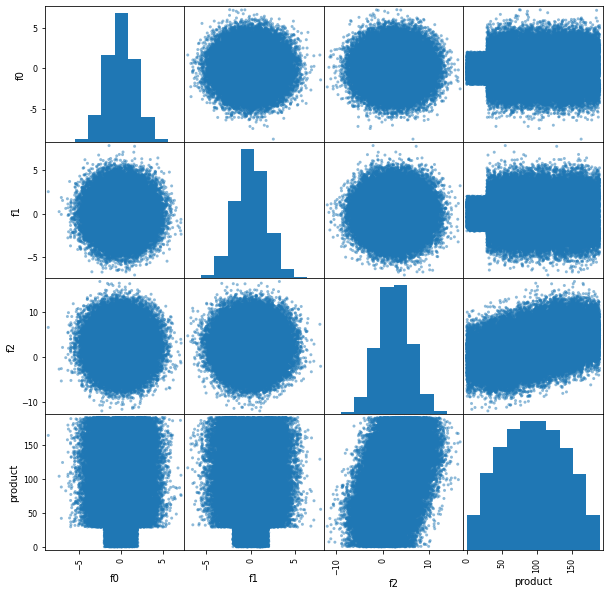

In [161]:
print(data_2.corr())
pd.plotting.scatter_matrix(data_2, figsize=(10, 10)) 
plt.show()

In [162]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [163]:
data_2.duplicated().sum()

0

Вывод по 3 региону:
- Имеем 10000 срок и 4 столбца
- Типы данных float64
- Данные нормально распределены
- Нет пропусков и дубликатов

**Проверим распределения целевого признака в регионах**

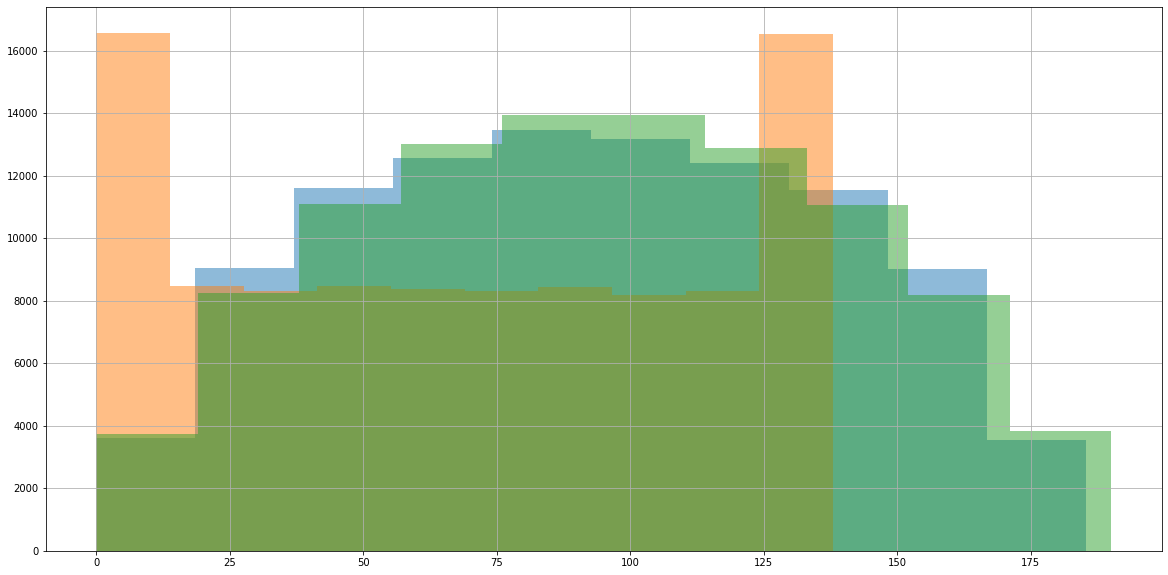

In [164]:
data_0['product'].hist(bins=10, alpha=0.5, figsize = (20,10)) 
data_1['product'].hist(bins=10, alpha=0.5, figsize = (20,10)) 
data_2['product'].hist(bins=10, alpha=0.5, figsize = (20,10)) 
plt.show()

В 1 и 3 регионе целевой признак распределен нормально, как мы уже видели в диаграммах рассеивания до этого, а во втором регионе моды в самых крайних местах распределения: то есть в минимальных и максимальных значениях, что говорит, что запас скважин либо пуст, либо переполнен больше медианных значений в других регионах, остальные значения второго региона держатся стобильно на всем отрезке наблюдений. 

In [165]:
print('Cреднее значение обьемов запасов в первом регионе:', data_0['product'].mean(), 'медианное значение:',data_0['product'].median())
print('Cреднее значение обьемов запасов во втором регионе:', data_1['product'].mean(), 'медианное значение:',data_1['product'].median())
print('Cреднее значение обьемов запасов в третьем регионе:', data_2['product'].mean(), 'медианное значение:',data_2['product'].median())

Cреднее значение обьемов запасов в первом регионе: 92.50000000000001 медианное значение: 91.84997204396296
Cреднее значение обьемов запасов во втором регионе: 68.82500000000002 медианное значение: 57.08562464628662
Cреднее значение обьемов запасов в третьем регионе: 95.00000000000004 медианное значение: 94.92561258990247


Вывод:
- Все данные имеют 10000 строк и 4 столбца
- В данных нет пропусков и выбросов
- Распределение целевого признака во 2 регионе отличается от нормального распределения и от других регионов
- И среднее и медианное значение второго региона по обьемам запасов меньше чем в других

## Обучение и проверка модели

### Перед разбиением данных на выборки нужно применить технику порядкового кодирования

#### Применение OrdinalEncoder к 1 региону

In [166]:
#encoder_0 = OrdinalEncoder() 
#encoder_0.fit(data_0)
#data_ordinal_0 = pd.DataFrame(encoder_0.transform(data_0), columns=data_0.columns)
#data_0['id'] = (data_ordinal_0['id']).astype('int')
#data_0.head()
data_0 = data_0.drop(['id'],axis=1)
data_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


#### Применение OrdinalEncoder к 2 региону

In [167]:
#encoder_1 = OrdinalEncoder() 
#encoder_1.fit(data_1)
#data_ordinal_1 = pd.DataFrame(encoder_1.transform(data_1), columns=data_1.columns)
#data_1['id'] = (data_ordinal_1['id']).astype('int')
#data_1.head()
data_1 = data_1.drop(['id'],axis=1)
data_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


#### Применение OrdinalEncoder к 3 региону

In [168]:
#encoder_2 = OrdinalEncoder() 
#encoder_2.fit(data_2)
#data_ordinal_2 = pd.DataFrame(encoder_2.transform(data_2), columns=data_2.columns)
#data_2['id'] = (data_ordinal_2['id']).astype('int')
#data_2.head()
data_2 = data_2.drop(['id'],axis=1)
data_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


### Разобьем данные на обучающую и валидационную выборки в соотношении 75:25

Подготовим целевые признаки и обучающие

In [169]:
target_0=data_0['product']
features_0=data_0.drop(['product'], axis=1)

target_1=data_1['product']
features_1=data_1.drop(['product'], axis=1)

target_2=data_2['product']
features_2=data_2.drop(['product'], axis=1)

#### Разделение 1 региона

In [170]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=42)
procent_valid=target_valid_0.shape[0]/target_0.shape[0]
procent_train=target_train_0.shape[0]/target_0.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(procent_train))
print('Размер валидационной выборки - {:.0%}'.format(procent_valid))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


#### Разделение 2 региона

In [171]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=42)
procent_valid=target_valid_1.shape[0]/target_1.shape[0]
procent_train=target_train_1.shape[0]/target_1.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(procent_train))
print('Размер валидационной выборки - {:.0%}'.format(procent_valid))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


#### Разделение 3 региона

In [172]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=42)
procent_valid=target_valid_2.shape[0]/target_2.shape[0]
procent_train=target_train_2.shape[0]/target_2.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(procent_train))
print('Размер валидационной выборки - {:.0%}'.format(procent_valid))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


### Обучим модель и сделаем предсказания на валидационной выборке.


Для оценки качества моделей посчитаем коэффициент детерминации и корень из среднеквадратичной ошибки.

#### Регион 1

In [173]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_0 = model_0.predict(features_valid_0)

rmse = mean_squared_error(target_valid_0, predicted_0) ** 0.5
r2 = model_0.score(features_valid_0, target_valid_0)
print(f'RMSE 1 региона: {rmse},\nR2 1 региона: {r2}')

RMSE 1 региона: 37.75660035026169,
R2 1 региона: 0.2728287328173471


#### Регион 2

In [174]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_1 = model_1.predict(features_valid_1)

rmse = mean_squared_error(target_valid_1, predicted_1) ** 0.5
r2 = model_1.score(features_valid_1, target_valid_1)

print(f'RMSE 2 региона: {rmse},\nR2 2 региона: {r2}')

RMSE 2 региона: 0.890280100102884,
R2 2 региона: 0.9996245232002449


#### Регион 3

In [175]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_2 = model_2.predict(features_valid_2)

rmse = mean_squared_error(target_valid_2, predicted_2) ** 0.5
r2 = model_2.score(features_valid_2, target_valid_2)

print(f'RMSE 3 региона: {rmse},\nR2 3 региона: {r2}')

RMSE 3 региона: 40.145872311342174,
R2 3 региона: 0.19634705977280487


### Сохраним предсказания и правильные ответы на валидационной выборке.

In [176]:
print(f'регион 1:\n- Предсказания модели: "predicted_0"\n- Правильные ответы: "target_valid_0"')
print()
print(f'регион 2:\n- Предсказания модели: "predicted_1"\n- Правильные ответы: "target_valid_1"')
print()
print(f'регион 3:\n- Предсказания модели: "predicted_2"\n- Правильные ответы: "target_valid_2"')

регион 1:
- Предсказания модели: "predicted_0"
- Правильные ответы: "target_valid_0"

регион 2:
- Предсказания модели: "predicted_1"
- Правильные ответы: "target_valid_1"

регион 3:
- Предсказания модели: "predicted_2"
- Правильные ответы: "target_valid_2"


### Напечатаем на экране средний запас предсказанного сырья и RMSE модели.

In [177]:
print(f'регион 1: \nСредний запас предсказанного сырья: {predicted_0.mean()}\nRSME модели:\
      {(mean_squared_error(target_valid_0, predicted_0) ** 0.5)}\n')
print(f'регион 2: \nСредний запас предсказанного сырья: {predicted_1.mean()}\nRSME модели:\
      {(mean_squared_error(target_valid_1, predicted_1) ** 0.5)}\n')
print(f'регион 3: \nСредний запас предсказанного сырья: {predicted_2.mean()}\nRSME модели:\
      {(mean_squared_error(target_valid_2, predicted_2) ** 0.5)}')

регион 1: 
Средний запас предсказанного сырья: 92.39879990657768
RSME модели:      37.75660035026169

регион 2: 
Средний запас предсказанного сырья: 68.71287803913762
RSME модели:      0.890280100102884

регион 3: 
Средний запас предсказанного сырья: 94.77102387765939
RSME модели:      40.145872311342174


### Проанализируем результаты.

Вывод:
- Для каждого региона обучили и проверили модель логистической регрессии
- Имеем следующие результаты:
    - регион 1: 
        - Средний запас предсказанного сырья: 92.39912564441762
        - RSME модели:      37.75679972531727
    - регион 2: 
        - Средний запас предсказанного сырья: 68.7128783572836
        - RSME модели:      0.8902625051266332
    - регион 3: 
        - Средний запас предсказанного сырья: 94.77226826114993
        - RSME модели:      40.145722882517624
- Модель предсказывает почти одинаково высокое ожидание запаса сырья для 1 и 3 региона, а для 2 существенно меньше, величина ошибки во втором регионе тоже существенно отличается от 1 и 3, это связанно с тем, что распределение во втором регионе не имеет нормальное распределение как в 2 других.

## Подготовка к расчёту прибыли

### Все ключевые значения для расчётов сохраним в отдельных переменных.

In [178]:
ALL_POINTS = 500
BEST_POINTS = 200
BUDGET = 10_000_000 #Бюджет на разработку скважин в регионе в тыс. р.
INCOME_ONE_BAREL = 450 #Доход с каждой единицы продукта в тыс. р.
target_probability_losses = .025 # Вероятность убытков
product_mean_0 = round(data_0['product'].mean(),2)
product_mean_1 = round(data_1['product'].mean(),1)
product_mean_2 = round(data_2['product'].mean(),2)

In [179]:
print(f'Cредний ожидаемый запас сырья в 1 регионе: {product_mean_0} млн.баррелей')
print(f'Cредний ожидаемый запас сырья в 2 регионе: {product_mean_1} млн.баррелей')
print(f'Cредний ожидаемый запас сырья в 3 регионе: {product_mean_2} млн.баррелей')

Cредний ожидаемый запас сырья в 1 регионе: 92.5 млн.баррелей
Cредний ожидаемый запас сырья в 2 регионе: 68.8 млн.баррелей
Cредний ожидаемый запас сырья в 3 регионе: 95.0 млн.баррелей


In [180]:
BUDGET_PER_ONE_POINT=(BUDGET/BEST_POINTS)
print(f'Бюджет на разработку одной скважины: {BUDGET_PER_ONE_POINT/1000} млн. рублей.')

Бюджет на разработку одной скважины: 50.0 млн. рублей.


### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [181]:
v_prod=BUDGET_PER_ONE_POINT/INCOME_ONE_BAREL
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%v_prod,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


#### Сравним полученный объём сырья со средним запасом в 1 регионе

In [182]:
data_0['profit']=(data_0['product']*(INCOME_ONE_BAREL)).round(2) # profit, тыс.руб
data_0.head()

,f0,f1,f2,product,profit
0,0.705745,-0.497823,1.221170,105.280062,47376.03
1,1.334711,-0.340164,4.365080,73.037750,32866.99
2,1.022732,0.151990,1.419926,85.265647,38369.54
3,-0.032172,0.139033,2.978566,168.620776,75879.35
4,1.988431,0.155413,4.751769,154.036647,69316.49


**Определим значение ROI (return on investmen) для каждой скважины**

In [183]:
data_0['ROI']=((data_0['profit']-BUDGET_PER_ONE_POINT)/BUDGET_PER_ONE_POINT).round(2)
data_0.head()

,f0,f1,f2,product,profit,ROI
0,0.705745,-0.497823,1.221170,105.280062,47376.03,-0.05
1,1.334711,-0.340164,4.365080,73.037750,32866.99,-0.34
2,1.022732,0.151990,1.419926,85.265647,38369.54,-0.23
3,-0.032172,0.139033,2.978566,168.620776,75879.35,0.52
4,1.988431,0.155413,4.751769,154.036647,69316.49,0.39


In [184]:
ROI_0 = data_0['ROI'].mean().round(3)

print(f'Cреднее значение ROI для 1 региона: {ROI_0}')

Cреднее значение ROI для 1 региона: -0.168


In [185]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: \n{:.2%}'.format(product_mean_0/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_0))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: 
-16.75%
Или 18.61 тыс.баррелей


#### Сравним полученный объём сырья со средним запасом в 2 регионе

In [186]:
data_1['profit']=(data_1['product']*INCOME_ONE_BAREL).round(2) # profit, тыс.руб
data_1.head()

,f0,f1,f2,product,profit
0,-15.001348,-8.276000,-0.005876,3.179103,1430.60
1,14.272088,-3.475083,0.999183,26.953261,12128.97
2,6.263187,-5.948386,5.001160,134.766305,60644.84
3,-13.081196,-11.506057,4.999415,137.945408,62075.43
4,12.702195,-8.147433,5.004363,134.766305,60644.84


In [187]:
data_1['ROI']=((data_1['profit']-BUDGET_PER_ONE_POINT)/BUDGET_PER_ONE_POINT).round(2)
data_1.head()

,f0,f1,f2,product,profit,ROI
0,-15.001348,-8.276000,-0.005876,3.179103,1430.60,-0.97
1,14.272088,-3.475083,0.999183,26.953261,12128.97,-0.76
2,6.263187,-5.948386,5.001160,134.766305,60644.84,0.21
3,-13.081196,-11.506057,4.999415,137.945408,62075.43,0.24
4,12.702195,-8.147433,5.004363,134.766305,60644.84,0.21


In [188]:
ROI_1 = data_1['ROI'].mean().round(3)

print(f'Cреднее значение ROI для 2 региона: {ROI_1}')

Cреднее значение ROI для 2 региона: -0.38


In [189]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: {:.2%}'.format(product_mean_1/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_1))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: -38.08%
Или 42.31 тыс.баррелей


#### Сравним полученный объём сырья со средним запасом в 3 регионе

In [190]:
data_2['profit']=(data_2['product']*INCOME_ONE_BAREL).round(2) # profit, тыс.руб
data_2.head()

,f0,f1,f2,product,profit
0,-1.146987,0.963328,-0.828965,27.758673,12491.40
1,0.262778,0.269839,-2.530187,56.069697,25231.36
2,0.194587,0.289035,-5.586433,62.871910,28292.36
3,2.236060,-0.553760,0.930038,114.572842,51557.78
4,-0.515993,1.716266,5.899011,149.600746,67320.34


In [191]:
data_2['ROI']=((data_2['profit']-BUDGET_PER_ONE_POINT)/BUDGET_PER_ONE_POINT).round(2)
data_2.head()

,f0,f1,f2,product,profit,ROI
0,-1.146987,0.963328,-0.828965,27.758673,12491.40,-0.75
1,0.262778,0.269839,-2.530187,56.069697,25231.36,-0.50
2,0.194587,0.289035,-5.586433,62.871910,28292.36,-0.43
3,2.236060,-0.553760,0.930038,114.572842,51557.78,0.03
4,-0.515993,1.716266,5.899011,149.600746,67320.34,0.35


In [192]:
ROI_2 = data_2['ROI'].mean().round(3)

print(f'Cреднее значение ROI для 3 региона: {ROI_2}')

Cреднее значение ROI для 3 региона: -0.145


In [193]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 3 региону составляет: {:.2%}'.format(product_mean_2/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_2))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 3 региону составляет: -14.50%
Или 16.11 тыс.баррелей


### Напишем выводы по этапу подготовки расчёта прибыли.

Вывод:
- Для окупаемости скважена должна приносить не меньше 111,11 тыс барылей
- в первом регионе добывается на 18.61 тыс.баррелей меньше
- во втором регионе добывается на 42.31 тыс.баррелей меньше
- в третьем регионе добывается на 16.11 тыс.баррелей меньше
- Для окупаемости среднего значения не хватает

# Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:


### Выберите скважины с максимальными значениями предсказаний.¶

In [194]:
predicted_0

array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
        81.82668931,  93.12106221])

Индексы скважин привяжем к предсказаниям модели и отсорируем список

In [195]:
probs_sorted_0 = pd.Series(predicted_0, index=target_valid_0.index).sort_values(ascending=False)
selected_max_0 = probs_sorted_0[:200]
selected_max_0

46784    176.536104
27658    176.274510
6496     173.249504
65743    172.802708
93716    172.744977
            ...    
14042    146.952653
65925    146.948764
65549    146.947483
9462     146.946515
39838    146.874947
Length: 200, dtype: float64

### Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

Выберем 200 скважен с наибольшими показателями добываемого сырья для максимизации доходов

In [196]:
selected_max_0_sum = selected_max_0.sum()
print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max_0_sum)

Суммарный запас сырья в 200 лучших скважинах составит: 30881.46 тыс.баррелей


###  Рассчитайте прибыль для полученного объёма сырья.

In [197]:
profit_pred_0=(selected_max_0_sum*INCOME_ONE_BAREL)-BUDGET
print('Прибыль для полученного объёма сырья с 200 лучших точек 1 региона составит %.2f тыс.рублей'%profit_pred_0)

Прибыль для полученного объёма сырья с 200 лучших точек 1 региона составит 3896658.48 тыс.рублей


*Функция для подсчета прибыли с каждого региона на 200 лучших точках*

In [198]:
def income(predicted,target,count=200):
    probs_sorted = pd.Series(predicted, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum()
    profit_pred=(selected_max*INCOME_ONE_BAREL)-BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

In [199]:
def income(target, predicted, COUNT):
    preds_sorted = pd.Series(predicted, index=target.index).sort_values(ascending=False)
    selected = target[preds_sorted.index][:COUNT].sum()
    profit_pred= INCOME_ONE_BAREL * selected - BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

#### Прибыль в 1 регионе

In [200]:
income(target_valid_0, predicted_0, BEST_POINTS)

Суммарный запас сырья в 200 лучших скважинах составит: 29686.98 тыс.баррелей
Прибыль для полученного объёма сырья составит 3359.14 млн.рублей


#### Прибыль в 2 регионе

In [201]:
income(target_valid_1, predicted_1, BEST_POINTS)

Суммарный запас сырья в 200 лучших скважинах составит: 27589.08 тыс.баррелей
Прибыль для полученного объёма сырья составит 2415.09 млн.рублей


#### Прибыль в 3 регионе

In [202]:
income(target_valid_2, predicted_2, BEST_POINTS)

Суммарный запас сырья в 200 лучших скважинах составит: 27996.83 тыс.баррелей
Прибыль для полученного объёма сырья составит 2598.57 млн.рублей


Вывод: 
- При выборе лучших 200 точек каждый регион может окупиться
- Самый ресурсный 1 регион имеет на лучших 200 точках:
    - 27748.75 тыс.баррелей
    - Прибыль с которых составит 3896.88 млн.рублей

## Расчёт прибыли и рисков 

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [203]:
def profit_for_vp2(predicted,target,count):
    probs_sorted = pd.Series(predicted).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_BAREL
    return revenue - BUDGET

In [204]:
def bootstrap_1000(target,predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample,target_subsample, 200))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    #plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(16,10))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))

#### Первый регион

  0%|          | 0/1000 [00:00<?, ?it/s]

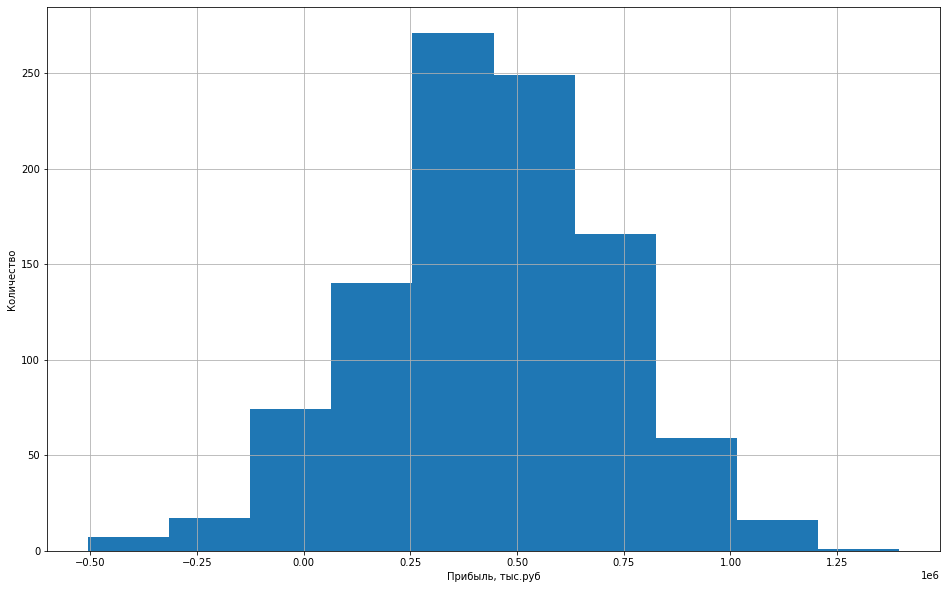

Средняя прибыль: 435.93 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -116.23 млн.руб до: 966.50 млн.руб
95%-ый доверительный интервал: от 418.76 млн.руб до 453.11 млн.руб
Процент вероятности убытка в данном регионе составит 6.1%


In [205]:
bootstrap_1000(target_valid_0,predicted_0)

#### Второй регион

  0%|          | 0/1000 [00:00<?, ?it/s]

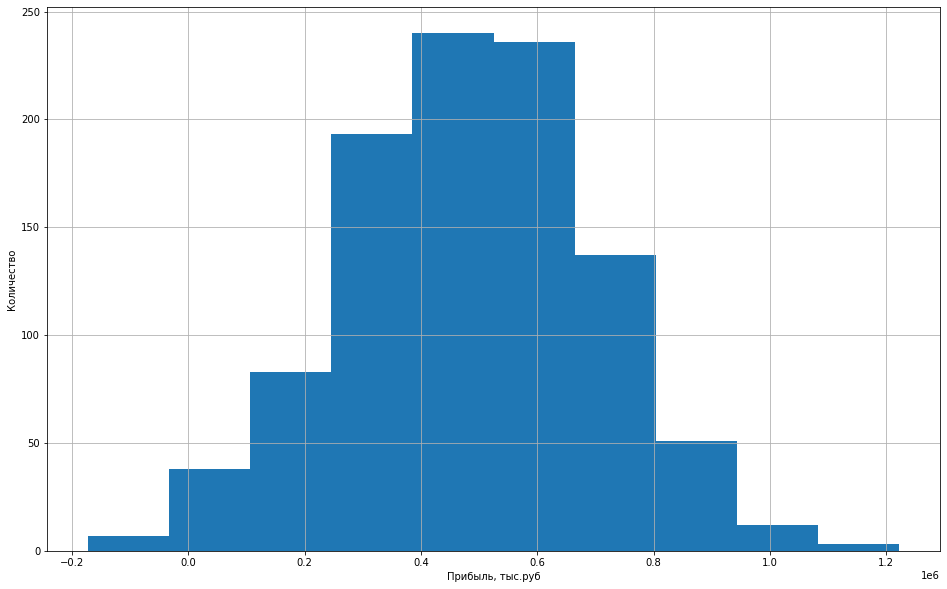

Средняя прибыль: 489.66 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 55.12 млн.руб до: 905.76 млн.руб
95%-ый доверительный интервал: от 476.23 млн.руб до 503.09 млн.руб
Процент вероятности убытка в данном регионе составит 1.1%


In [206]:
bootstrap_1000(target_valid_1,predicted_1)

#### Третий регион

  0%|          | 0/1000 [00:00<?, ?it/s]

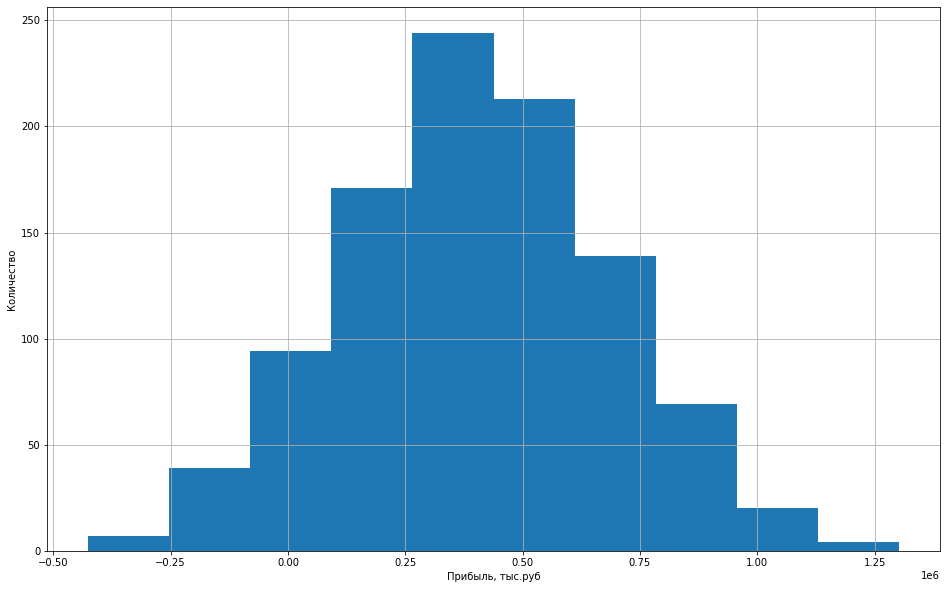

Средняя прибыль: 403.69 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -153.12 млн.руб до: 952.89 млн.руб
95%-ый доверительный интервал: от 386.21 млн.руб до 421.17 млн.руб
Процент вероятности убытка в данном регионе составит 7.1%


In [207]:
bootstrap_1000(target_valid_2,predicted_2)

### Напишем выводы: предложем регион для разработки скважин и обоснуем выбор.

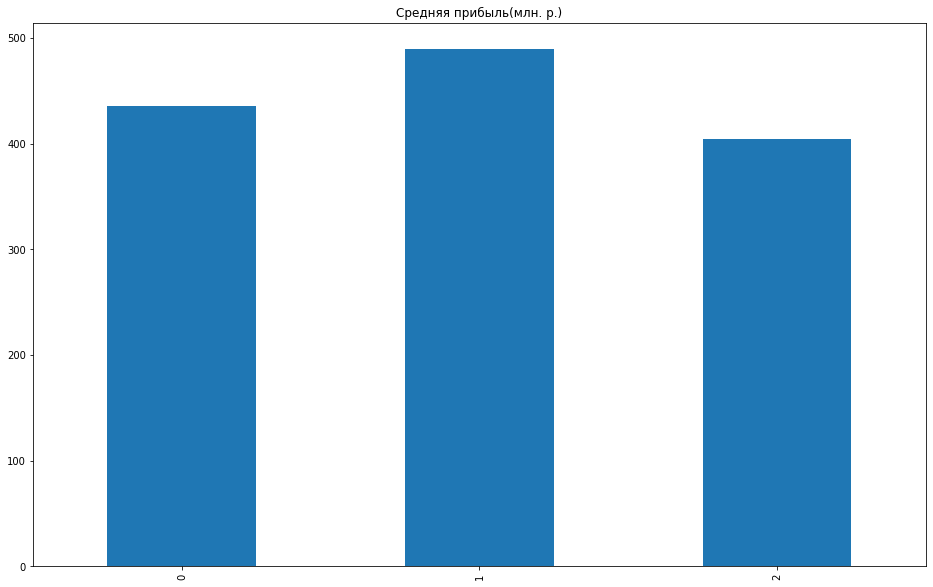

In [208]:
x = pd.Series([435.84,489.66,403.95])
x.plot(kind='bar',title='Средняя прибыль(млн. р.)',figsize=(16,10))
plt.show()

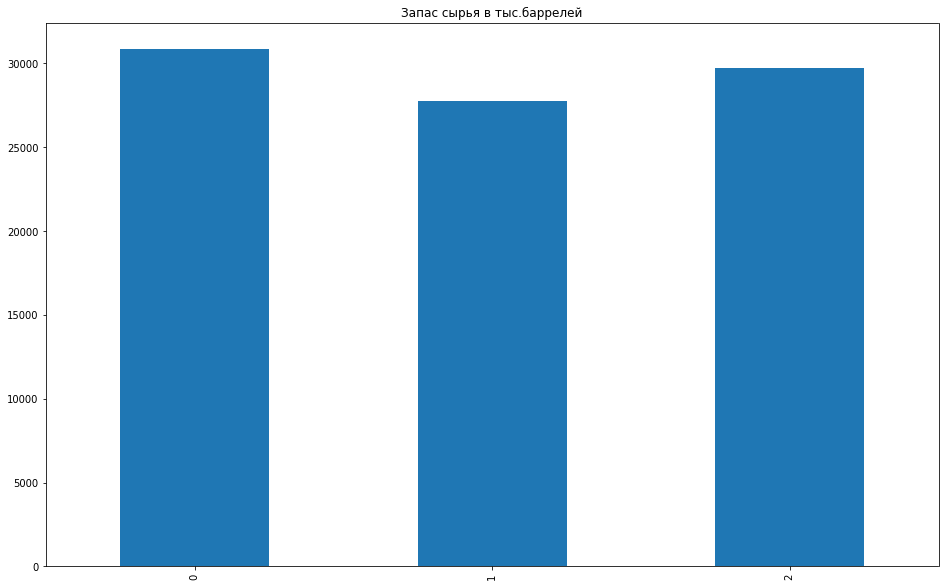

In [209]:
x = pd.Series([30881.96,27748.75,29730.68])
x.plot(kind='bar',title='Запас сырья в тыс.баррелей',figsize=(16,10))
plt.show()

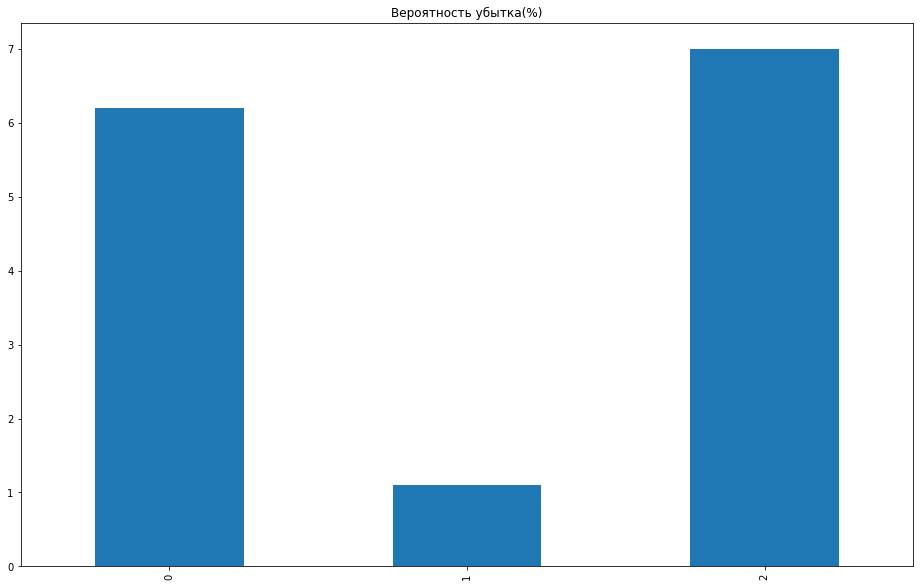

In [210]:
x = pd.Series([6.2,1.1,7.0])
x.plot(kind='bar',title='Вероятность убытка(%)',figsize=(16,10))
plt.show()

**Проанализировав все три региона, можно придти к выводу, что наилучшим местом для размещения скважен является 2 регион, поскольку вероятность убытков в нем всего 1.1%, другие два региона не прошли проверку на риск потерь, не смотря на то, что средние запасы во 2 регионе меньше, средний доход в них выше, и как мы помним из предыдущего анализа, в данном регионе гораздо быльше точек с максимальными показателями обьемов сырья, ожидаемый доход при постройке 200 точек составляет 489.66 млн. рублей.**

# Общий вывод

- Все регионы имеют 10000 строк и 4 столбца
- В данных отсутсвуют пропуски
- Корреляция весьма специфическая, скорее всего данные синтетичские
- Целевой признак 2 региона имеет 2 моды по краям распределения вместо нормального распределения
- Для каждого региона обучили и проверили модель логистической регрессии
- Имеем следующие результаты:
    - регион 1: 
        - Средний запас предсказанного сырья: 92.39912564441762
        - RSME модели:      37.75679972531727
    - регион 2: 
        - Средний запас предсказанного сырья: 68.7128783572836
        - RSME модели:      0.8902625051266332
    - регион 3: 
        - Средний запас предсказанного сырья: 94.77226826114993
        - RSME модели:      40.145722882517624
- Модель предсказывает почти одинаково высокое ожидание запаса сырья для 1 и 3 региона, а для 2 существенно меньше, величина ошибки во втором регионе тоже существенно отличается от 1 и 3, это связанно с тем, что распределение во втором регионе не имеет нормальное распределение как в 2 других.
- Для окупаемости скважена должна приносить не меньше 111,11 тыс барылей
- в первом регионе добывается на 18.61 тыс.баррелей меньше
- во втором регионе добывается на 42.31 тыс.баррелей меньше
- в третьем регионе добывается на 16.11 тыс.баррелей меньше
- Для окупаемости среднего значения не хватает
- При выборе лучших 200 точек каждый регион может окупиться
- Самый ресурсный 1 регион имеет на лучших 200 точках:
    - 27748.75 тыс.баррелей
    - Прибыль с которых составит 3896.88 млн.рублей
- **Проанализировав все три региона, можно придти к выводу, что наилучшим местом для размещения скважен является 2 регион, поскольку вероятность убытков в нем всего 1.1%, другие два региона не прошли проверку на риск потерь, не смотря на то, что средние запасы во 2 регионе меньше, средний доход в них выше, и как мы помним из предыдущего анализа, в данном регионе гораздо быльше точек с максимальными показателями обьемов сырья, ожидаемый доход при постройке 200 точек составляет 489.66 млн. рублей.**